# Project 2
- 2-layer Recurrent Neural Network
  - Vanilla RNN
  - LSTM

### Prepare Training/Test Dataset

In [1]:
# import modules
import numpy as np
import pandas as pd
import zipfile
import math
import matplotlib.pyplot as plt
import seaborn as sns
from data_train_test.emo_utils import *
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# prepare dataset
# unzip dataset folder
# dataset = zipfile.ZipFile("data_train_test.zip")
# dataset.extractall()
# glove = zipfile.ZipFile("glove.6B.zip")
# glove.extractall()

In [3]:
# set glove file
glove_file_50 = "glove.6B.50d.txt"
words_to_index_50, index_to_words_50, word_to_vec_map_50 = read_glove_vecs(glove_file_50)

glove_file_100 = "glove.6B.100d.txt"
words_to_index_100, index_to_words_100, word_to_vec_map_100 = read_glove_vecs(glove_file_100)

In [4]:
# set train test data
train_dataset = "./data_train_test/train_emoji.csv"
test_dataset = "./data_train_test/test_emoji.csv"

train_x, train_y = read_csv(train_dataset)
test_x, test_y = read_csv(test_dataset)

print("=============Train X data=============")
print(train_x[:10])
print("train X data's shape: {}".format(train_x.shape))
print("=============Train Y data=============")
print(train_y[:10])
print("train Y data's shape: {}".format(train_y.shape))

print("=============Test X data=============")
print(test_x[:10])
print("test X data's shape: {}".format(test_x.shape))
print("=============Test Y data=============")
print(test_y[:10])
print("test Y data's shape: {}".format(test_y.shape))

=============Train X data=============
['never talk to me again' 'I am proud of your achievements'
 'It is the worst day in my life' 'Miss you so much' 'food is life'
 'I love you mum' 'Stop saying bullshit'
 'congratulations on your acceptance' 'The assignment is too long '
 'I want to go play']
train X data's shape: (132,)
=============Train Y data=============
[3 2 3 0 4 0 3 2 3 1]
train Y data's shape: (132,)
=============Test X data=============
['I want to eat\t' 'he did not answer\t' 'he got a very nice raise\t'
 'she got me a nice present\t' 'ha ha ha it was so funny\t'
 'he is a good friend\t' 'I am upset\t'
 'We had such a lovely dinner tonight\t' 'where is the food\t'
 'Stop making this joke ha ha ha\t']
test X data's shape: (56,)
=============Test Y data=============
[4 3 2 2 2 2 3 2 4 2]
test Y data's shape: (56,)


### Word Embedding

In [5]:
train_x_length = len(train_x)
test_x_length = len(test_x)

train_x_emb_50 = [[] for _ in range(train_x_length)]
test_x_emb_50 = [[] for _ in range(test_x_length)]

for i in range(train_x_length):
    token = train_x[i].split()
    for j in range(len(token)):
        train_x_emb_50[i].append(word_to_vec_map_50[token[j].lower()].reshape(1, -1))
    if i == 0:
        print("=============Train X data Embedding=============")
        print(token)
        print(train_x_emb_50[i])
        
for i in range(test_x_length):
    token = test_x[i].split()
    for j in range(len(token)):
        test_x_emb_50[i].append(word_to_vec_map_50[token[j].lower()].reshape(1, -1))
    if i == 0:
        print("=============Test X data Embedding=============")
        print(token)
        print(test_x_emb_50[i])
    
        
train_x_emb_50 = np.array(train_x_emb_50)
test_x_emb_50 = np.array(test_x_emb_50)

=============Train X data Embedding=============
['never', 'talk', 'to', 'me', 'again']
[array([[ 0.095387 , -0.16865  , -0.11514  , -0.51114  ,  0.38331  ,
         0.22658  , -0.78504  ,  0.67626  , -0.66857  ,  0.18847  ,
         0.19963  ,  0.58351  , -0.86134  , -0.39472  ,  1.1571   ,
         0.51657  ,  0.11706  ,  0.0062629, -0.2593   , -0.33371  ,
        -0.47957  ,  0.6211   ,  0.66831  , -0.058046 ,  0.81305  ,
        -2.341    , -0.75437  ,  0.2167   ,  0.78012  , -0.81362  ,
         2.9368   ,  0.13466  , -0.38043  , -0.59615  , -0.093113 ,
        -0.2843   ,  0.28314  ,  0.59791  , -0.20751  , -0.43841  ,
        -0.34187  , -0.21166  , -0.082453 ,  0.44007  , -0.3365   ,
        -0.091078 , -0.45859  , -0.42103  , -0.53817  ,  0.13738  ]]), array([[-0.034604,  0.41087 , -0.097368, -0.19548 , -0.05855 , -0.2581  ,
        -0.85141 ,  0.19582 , -0.76829 ,  0.37035 , -0.63907 ,  0.30593 ,
        -0.38117 ,  0.40505 ,  0.90915 ,  0.54359 , -0.088861,  0.17422 ,
      

In [6]:
train_x_emb_100 = [[] for _ in range(train_x_length)]
test_x_emb_100 = [[] for _ in range(test_x_length)]

for i in range(train_x_length):
    token = train_x[i].split()
    for j in range(len(token)):
        train_x_emb_100[i].append(word_to_vec_map_100[token[j].lower()].reshape(1, -1))
    if i == 0:
        print("=============Train X data Embedding=============")
        print(token)
        print(train_x_emb_100[i])
        
for i in range(test_x_length):
    token = test_x[i].split()
    for j in range(len(token)):
        test_x_emb_100[i].append(word_to_vec_map_100[token[j].lower()].reshape(1, -1))
    if i == 0:
        print("=============Test X data Embedding=============")
        print(token)
        print(test_x_emb_100[i])
    
        
train_x_emb_100 = np.array(train_x_emb_100)
test_x_emb_100 = np.array(test_x_emb_100)

=============Train X data Embedding=============
['never', 'talk', 'to', 'me', 'again']
[array([[ 0.28308  ,  0.3328   ,  0.50003  , -0.2043   , -0.34403  ,
         0.10466  ,  0.25852  ,  0.11798  ,  0.50594  , -0.22371  ,
         0.52499  ,  0.59336  ,  0.52034  ,  0.38505  , -0.094194 ,
        -0.27289  ,  0.3719   ,  0.71022  , -0.78723  ,  0.142    ,
         0.23843  ,  0.17683  , -0.13     , -0.51327  ,  0.13746  ,
         0.092858 , -0.47914  , -1.0342   ,  0.51481  , -0.4158   ,
         0.17622  ,  1.0603   ,  0.038309 ,  0.47409  ,  0.34532  ,
         0.10244  , -0.10949  ,  0.031997 , -0.03563  , -0.073314 ,
        -0.61494  , -0.0056377,  0.40174  , -0.47975  , -0.053224 ,
        -0.23983  ,  0.64644  , -0.48115  ,  0.73126  , -1.4097   ,
         0.15377  , -0.093436 ,  0.42553  ,  1.0389   ,  0.35117  ,
        -2.2379   , -0.2496   ,  0.24372  ,  0.92944  ,  0.87231  ,
         0.24636  ,  0.85973  , -0.72904  , -0.30587  ,  1.1191   ,
        -0.16524  ,  0.6531

In [7]:
# embedded dataset shape
print("train_x_emb_50's shape: {}".format(train_x_emb_50.shape))  # (132, # of tokens, 50(embedding dim))
print("test_x_emb_50's shape: {}".format(test_x_emb_50.shape))
print("train_x_emb_100's shape: {}".format(train_x_emb_100.shape))  # (132, # of tokens, 100(embedding dim))
print("test_x_emb_100's shape: {}".format(test_x_emb_100.shape))
print(train_x_emb_50[0])
print(train_x_emb_100[0])

train_x_emb_50's shape: (132,)
test_x_emb_50's shape: (56,)
train_x_emb_100's shape: (132,)
test_x_emb_100's shape: (56,)
[array([[ 0.095387 , -0.16865  , -0.11514  , -0.51114  ,  0.38331  ,
         0.22658  , -0.78504  ,  0.67626  , -0.66857  ,  0.18847  ,
         0.19963  ,  0.58351  , -0.86134  , -0.39472  ,  1.1571   ,
         0.51657  ,  0.11706  ,  0.0062629, -0.2593   , -0.33371  ,
        -0.47957  ,  0.6211   ,  0.66831  , -0.058046 ,  0.81305  ,
        -2.341    , -0.75437  ,  0.2167   ,  0.78012  , -0.81362  ,
         2.9368   ,  0.13466  , -0.38043  , -0.59615  , -0.093113 ,
        -0.2843   ,  0.28314  ,  0.59791  , -0.20751  , -0.43841  ,
        -0.34187  , -0.21166  , -0.082453 ,  0.44007  , -0.3365   ,
        -0.091078 , -0.45859  , -0.42103  , -0.53817  ,  0.13738  ]]), array([[-0.034604,  0.41087 , -0.097368, -0.19548 , -0.05855 , -0.2581  ,
        -0.85141 ,  0.19582 , -0.76829 ,  0.37035 , -0.63907 ,  0.30593 ,
        -0.38117 ,  0.40505 ,  0.90915 ,  0.54

# Design Optimizer
- Stochastic Gradient Descent 
- ADAM



In [8]:
class SGD:
    def __init__(self, lr):
        self.lr = lr
        
    def update(self, param, d_param):
        param -= self.lr * d_param
        return param
    
class ADAM:
    def __init__(self, lr, beta_1 = 0.9, beta_2 = 0.999):
        self.lr = lr
        self.beta1 = beta_1
        self.beta2 = beta_2
        self.first_momentum = 0
        self.second_momentum = 0
        self.iter = 0
        
        
    def update(self, param, d_param):
        self.iter += 1
        # if self.iter == 1:
        #     b = ((1 - self.beta1) * d_param)
        #     print(b.shape)
        # else:
        #     a = (self.beta1 * self.first_momentum)
        #     print(a.shape)
        #     b = ((1 - self.beta1) * d_param)
        #     print(b.shape)
        self.first_momentum = self.beta1 * self.first_momentum + (1 - self.beta1) * d_param
        self.second_momentum = self.beta2 * self.second_momentum + (1 - self.beta2) * d_param * d_param
        first_unbias = self.first_momentum / (1 - self.beta1 ** self.iter)
        second_unbias = self.second_momentum / (1 - self.beta2 ** self.iter)
        return (param - self.lr * first_unbias / (np.sqrt(second_unbias) + 1e-8))
    
    def clear(self):
        self.first_momentum = 0
        self.second_momentum = 0
        self.iter = 0

# Design Sub Modules
### with backpropagation
- RNN Layer
- LSTM Layer
- FC Layer
- Dropout Layer

In [9]:
# RNN, LSTM Layer
class RNN_Cell():
    def __init__(self, input_size, hidden_size, optimizer, lr, beta1, beta2):
        np.random.seed(42)
        self.optimizer = optimizer
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.w_hh = np.random.normal(size = (hidden_size, hidden_size)) / 10
        self.w_xh = np.random.normal(size = (input_size, hidden_size)) / 10
        self.b_h = np.random.normal(size = (1, hidden_size)) / 10
        
        self.hidden_states = [np.zeros((1, hidden_size))]
        self.input_tokens = None
        self.len_tokens = 0
        
        self.dw_hh = np.zeros((hidden_size, hidden_size))
        self.dw_xh = np.zeros((input_size, hidden_size))
        self.db_h = np.zeros((1, hidden_size))
        
        if optimizer == "SGD":
            self.optimizers = {"w_hh": SGD(lr),
                               "w_xh": SGD(lr),
                               "b_h": SGD(lr)}
        elif optimizer == "ADAM":
            self.optimizers = {"w_hh": ADAM(lr, beta1, beta2),
                               "w_xh": ADAM(lr, beta1, beta2),
                               "b_h": ADAM(lr, beta1, beta2)}
        
        
            
    def forward(self, x):
        '''
        x:   (# of tokens, 1, glove dims) 
            embedded sentence
            
        hidden_states_per_sentence:     (# of tokens, 1, hidden_size)
            all hidden states of sentence
        '''
        
        # init per input
        self.hidden_states = [np.zeros((1, self.hidden_size))]
        self.len_tokens = len(x)
        self.input_tokens = x
        
        for i in range(self.len_tokens):
            # print(self.hidden_states[i].shape, self.w_hh.shape)
            # print(x[i].shape, self.w_xh.shape)
            # print(self.b_h.shape)
            hidden_state = np.matmul(self.hidden_states[i], self.w_hh) + np.matmul(x[i], self.w_xh) + self.b_h
            hidden_state = np.tanh(hidden_state)
            self.hidden_states.append(hidden_state)
        hidden_states_per_sentence = np.array(self.hidden_states[1:])
        return hidden_states_per_sentence
       
    def back_prop(self, dh):
        '''
        dh:   (# of tokens, 1, hidden_size)
            deriative backward
            
        back_prop dout:  (# of tokens, 1, input_size)
        '''
        # print("dh's shape: {}".format(dh.shape))
        if dh.shape[0] != self.len_tokens:
            last_h = dh
            dh = [np.zeros((1, self.hidden_size)) for _ in range(self.len_tokens - 1)]
            dh.append(last_h)
            dh = np.array(dh)
        
        # init per input    
        self.dw_hh = np.zeros((self.hidden_size, self.hidden_size))
        self.dw_xh = np.zeros((self.input_size, self.hidden_size))
        self.db_h = np.zeros((1, self.hidden_size))
        hidden_states = np.array(self.hidden_states)
        dinput = []
        dh_t = np.zeros((1, self.hidden_size))
        
        for i in reversed(range(self.len_tokens)):
            dh_t += dh[i]
            dresult = (1 - (hidden_states[i+1] ** 2)) * dh_t
            dh_t = np.matmul(dresult, self.w_hh.T)
            
            self.dw_hh += np.matmul(hidden_states[i-1].T, dresult)
            # print("input tokens's shape: {}, dresult's shape: {}".format(self.input_tokens[i].T.shape, dresult.shape))
            self.dw_xh += np.matmul(self.input_tokens[i].T, dresult)
            self.db_h += dresult
            dinput.append(np.matmul(dresult, self.w_xh.T))
        dinput.reverse()
                
        return np.array(dinput)
    
    def update(self):
        self.w_hh = self.optimizers["w_hh"].update(self.w_hh, self.dw_hh)
        self.w_xh = self.optimizers["w_xh"].update(self.w_xh, self.dw_xh)
        self.b_h = self.optimizers["b_h"].update(self.b_h, self.db_h)
        
    def clear_optim(self):
        if self.optimizer == "ADAM":
            self.optimizers["w_hh"].clear()
            self.optimizers["w_xh"].clear()
            self.optimizers["b_h"].clear()
        else: 
            print("Optimzier is SGD, SGD doesn't need to clear")


In [10]:
# sigmoid function

def Sigmoid(x):
    result = 1 / (1 + np.exp(-x))
    return result

In [11]:
class LSTM_Cell():
    def __init__(self, input_size, hidden_size, optimizer, lr, beta1, beta2):
        self.optimizer = optimizer
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        # forget gate
        self.w_xh_f = np.random.normal(size = (input_size, hidden_size)) / 10
        self.w_hh_f = np.random.normal(size = (hidden_size, hidden_size)) / 10
        self.b_h_f = np.random.normal(size = (1, hidden_size)) / 10
        
        self.dw_xh_f = np.zeros((input_size, hidden_size))
        self.dw_hh_f = np.zeros((hidden_size, hidden_size))
        self.db_h_f = np.zeros((1, hidden_size))
        
        # input gate
        self.w_xh_i = np.random.normal(size = (input_size, hidden_size)) / 10
        self.w_hh_i = np.random.normal(size = (hidden_size, hidden_size)) / 10
        self.b_h_i = np.random.normal(size = (1, hidden_size)) / 10
        
        self.dw_xh_i = np.zeros((input_size, hidden_size))
        self.dw_hh_i = np.zeros((hidden_size, hidden_size))
        self.db_h_i = np.zeros((1, hidden_size))
        
        self.w_xh_c = np.random.normal(size = (input_size, hidden_size)) / 10
        self.w_hh_c = np.random.normal(size = (hidden_size, hidden_size)) / 10
        self.b_h_c = np.random.normal(size = (1, hidden_size)) / 10
        
        self.dw_xh_c = np.zeros((input_size, hidden_size))
        self.dw_hh_c = np.zeros((hidden_size, hidden_size))
        self.db_h_c = np.zeros((1, hidden_size))
    
        # output gate
        self.w_xh_o = np.random.normal(size = (input_size, hidden_size)) / 10
        self.w_hh_o = np.random.normal(size = (hidden_size, hidden_size)) / 10
        self.b_h_o = np.random.normal(size = (1, hidden_size)) / 10
        
        self.dw_xh_o = np.zeros((input_size, hidden_size))
        self.dw_hh_o = np.zeros((hidden_size, hidden_size))
        self.db_h_o = np.zeros((1, hidden_size))
        
        # etc
        self.hidden_states = [np.zeros((1, hidden_size))]
        self.cell_states = [np.zeros((1, hidden_size))]
        self.forget_gate_results = []
        self.input_gate_sig_results = []
        self.input_gate_tanh_results = []
        self.output_gate_results = []
        
        self.input_tokens = None
        self.len_tokens = 0
        
        if optimizer == "SGD":
            self.optimizers = {"w_hh_f": SGD(lr),
                               "w_xh_f": SGD(lr),
                               "b_h_f": SGD(lr),
                               
                               "w_hh_i": SGD(lr),
                               "w_xh_i": SGD(lr),
                               "b_h_i": SGD(lr),
                               
                               "w_hh_c": SGD(lr),
                               "w_xh_c": SGD(lr),
                               "b_h_c": SGD(lr),
                               
                               "w_hh_o": SGD(lr),
                               "w_xh_o": SGD(lr),
                               "b_h_o": SGD(lr)}
        elif optimizer == "ADAM":
            self.optimizers = {"w_hh_f": ADAM(lr, beta1, beta2),
                               "w_xh_f": ADAM(lr, beta1, beta2),
                               "b_h_f": ADAM(lr, beta1, beta2),
                               
                               "w_hh_i": ADAM(lr, beta1, beta2),
                               "w_xh_i": ADAM(lr, beta1, beta2),
                               "b_h_i": ADAM(lr, beta1, beta2),
                               
                               "w_hh_c": ADAM(lr, beta1, beta2),
                               "w_xh_c": ADAM(lr, beta1, beta2),
                               "b_h_c": ADAM(lr, beta1, beta2),
                               
                               "w_hh_o": ADAM(lr, beta1, beta2),
                               "w_xh_o": ADAM(lr, beta1, beta2),
                               "b_h_o": ADAM(lr, beta1, beta2)}
        
        
        
    def forward(self, x):
        '''
        x:   (# of tokens, 1, glove dims) 
            embedded sentence
            
        hidden_states_per_sentence:     (# of tokens, 1, hidden_size)
            all hidden states of sentence
        '''
        # init per input
        self.hidden_states = [np.zeros((1, self.hidden_size))]
        self.cell_states = [np.zeros((1, self.hidden_size))]
        self.forget_gate_results = []
        self.input_gate_sig_results = []
        self.input_gate_tanh_results = []
        self.output_gate_results = []
        
        self.len_tokens = len(x)
        self.input_tokens = x
        
        for i in range(self.len_tokens):
            ht_1 = self.hidden_states[i]
            ct_1 = self.cell_states[i]
            token = x[i]
            
            f_t = Sigmoid(np.matmul(ht_1, self.w_hh_f) + np.matmul(token, self.w_xh_f) + self.b_h_f)
            i_t = Sigmoid(np.matmul(ht_1, self.w_hh_i) + np.matmul(token, self.w_xh_i) + self.b_h_i)
            cur_c_t = np.tanh(np.matmul(ht_1, self.w_hh_c) + np.matmul(token, self.w_xh_c) + self.b_h_c)
            o_t = Sigmoid(np.matmul(ht_1, self.w_hh_o) + np.matmul(token, self.w_xh_o) + self.b_h_o)
            
            self.forget_gate_results.append(f_t)
            self.input_gate_sig_results.append(i_t)
            self.input_gate_tanh_results.append(cur_c_t)
            self.output_gate_results.append(o_t)
            
            c_t = ct_1 * f_t + i_t * cur_c_t
            h_t = o_t * np.tanh(c_t)
            self.cell_states.append(c_t)
            self.hidden_states.append(h_t)
            
        hidden_states_per_sentence = np.array(self.hidden_states[1:])
        return hidden_states_per_sentence
        
    def back_prop(self, dh):
        # init per input
        self.dw_xh_f = np.zeros((self.input_size, self.hidden_size))
        self.dw_hh_f = np.zeros((self.hidden_size, self.hidden_size))
        self.db_h_f = np.zeros((1, self.hidden_size))
        
        self.dw_xh_i = np.zeros((self.input_size, self.hidden_size))
        self.dw_hh_i = np.zeros((self.hidden_size, self.hidden_size))
        self.db_h_i = np.zeros((1, self.hidden_size))
        
        self.dw_xh_c = np.zeros((self.input_size, self.hidden_size))
        self.dw_hh_c = np.zeros((self.hidden_size, self.hidden_size))
        self.db_h_c = np.zeros((1, self.hidden_size))
        
        self.dw_xh_o = np.zeros((self.input_size, self.hidden_size))
        self.dw_hh_o = np.zeros((self.hidden_size, self.hidden_size))
        self.db_h_o = np.zeros((1, self.hidden_size))
        
        dinput = []
        
        if dh.shape[0] != self.len_tokens:
            last_h = dh
            dh = [np.zeros((1, self.hidden_size)) for _ in range(self.len_tokens - 1)]
            dh.append(last_h)
            dh = np.array(dh)
        
        dh_t = np.zeros((1, self.hidden_size))
        dc_t = np.zeros((1, self.hidden_size))
        for i in reversed(range(self.len_tokens)):
            # load cur gate values, states and token
            f_t = self.forget_gate_results[i]
            i_t = self.input_gate_sig_results[i]
            cur_c_t = self.input_gate_tanh_results[i]
            o_t = self.output_gate_results[i]
            
            token = self.input_tokens[i]
            
            # hidden state's derivative and cell state's derivative
            dh_t += dh[i]
            dc_t += (1 - np.tanh(self.cell_states[i]) ** 2) * dh_t * self.output_gate_results[i]
            
            # gate results derivatives
            df_t = dc_t * self.cell_states[i - 1]
            di_t = dc_t * cur_c_t
            dcur_c_t = dc_t * i_t
            do_t = dh_t * np.tanh(self.cell_states[i])
            
            dbefore_act_f = df_t * (f_t * (1 - f_t))   # sigmoid
            dbefore_act_i = di_t * (i_t * (1 - i_t))   # sigmoid
            dbefore_act_c = dcur_c_t * (1 - cur_c_t ** 2)   # tanh
            dbefore_act_o = do_t * (o_t * (1 - o_t))   # sigmoid
            
            # set w's derivatives, b's derivatives
            self.db_h_f += dbefore_act_f
            self.db_h_i += dbefore_act_i
            self.db_h_c += dbefore_act_c
            self.db_h_o += dbefore_act_o
            
            self.dw_xh_f += np.matmul(token.T, dbefore_act_f)
            self.dw_xh_i += np.matmul(token.T, dbefore_act_i)
            self.dw_xh_c += np.matmul(token.T, dbefore_act_c)
            self.dw_xh_o += np.matmul(token.T, dbefore_act_o)
            
            self.dw_hh_f += np.matmul(self.hidden_states[i-1].T, dbefore_act_f)
            self.dw_hh_i += np.matmul(self.hidden_states[i-1].T, dbefore_act_i)
            self.dw_hh_c += np.matmul(self.hidden_states[i-1].T, dbefore_act_c)
            self.dw_hh_o += np.matmul(self.hidden_states[i-1].T, dbefore_act_o)        
            
            dx_t = np.matmul(dbefore_act_f, self.w_xh_f.T) + np.matmul(dbefore_act_i, self.w_xh_i.T) + \
                   np.matmul(dbefore_act_c, self.w_xh_c.T) + np.matmul(dbefore_act_o, self.w_xh_o.T)
            
            dinput.append(dx_t)
            dh_t = np.matmul(dbefore_act_f, self.w_hh_f.T) + np.matmul(dbefore_act_i, self.w_hh_i.T) + \
                   np.matmul(dbefore_act_c, self.w_hh_c.T) + np.matmul(dbefore_act_o, self.w_hh_o.T)
            dc_t = dc_t * self.forget_gate_results[i]
            
        dinput.reverse()
        dweights_x = [self.dw_xh_f, self.dw_xh_i, self.dw_xh_c, self.dw_xh_o]
        dweights_h = [self.dw_hh_f, self.dw_hh_i, self.dw_hh_c, self.dw_hh_o]
        dbias = [self.db_h_f, self.db_h_i, self.db_h_c, self.db_h_o]
        for d in dweights_h+dweights_x+dbias:
            np.clip(d, -1, 1, out=d)
        return np.array(dinput)
    
    def update(self):
        self.w_hh_f = self.optimizers["w_hh_f"].update(self.w_hh_f, self.dw_hh_f)
        self.w_xh_f = self.optimizers["w_xh_f"].update(self.w_xh_f, self.dw_xh_f)
        self.b_h_f = self.optimizers["b_h_f"].update(self.b_h_f, self.db_h_f)
        
        self.w_hh_i = self.optimizers["w_hh_i"].update(self.w_hh_i, self.dw_hh_i)
        self.w_xh_i = self.optimizers["w_xh_i"].update(self.w_xh_i, self.dw_xh_i)
        self.b_h_i = self.optimizers["b_h_i"].update(self.b_h_i, self.db_h_i)
        
        self.w_hh_c = self.optimizers["w_hh_c"].update(self.w_hh_c, self.dw_hh_c)
        self.w_xh_c = self.optimizers["w_xh_c"].update(self.w_xh_c, self.dw_xh_c)
        self.b_h_c = self.optimizers["b_h_c"].update(self.b_h_c, self.db_h_c)
        
        self.w_hh_o = self.optimizers["w_hh_o"].update(self.w_hh_o, self.dw_hh_o)
        self.w_xh_o = self.optimizers["w_xh_o"].update(self.w_xh_o, self.dw_xh_o)
        self.b_h_o = self.optimizers["b_h_o"].update(self.b_h_o, self.db_h_o)
            
    def clear_optim(self):
        if self.optimizer == "ADAM":
            self.optimizers["w_hh_f"].clear()
            self.optimizers["w_xh_f"].clear()
            self.optimizers["b_h_f"].clear()
            
            self.optimizers["w_hh_i"].clear()
            self.optimizers["w_xh_i"].clear()
            self.optimizers["b_h_i"].clear()
            
            self.optimizers["w_hh_c"].clear()
            self.optimizers["w_xh_c"].clear()
            self.optimizers["b_h_c"].clear()
            
            self.optimizers["w_hh_o"].clear()
            self.optimizers["w_xh_o"].clear()
            self.optimizers["b_h_o"].clear()
        else: 
            print("Optimzier is SGD, SGD doesn't need to clear")
        
# sample = train_x_emb_50[0]
# print("# of tokens: {}".format(len(sample)))
# r1 = LSTM_Cell(50, 10, "SGD")
# r2 = LSTM_Cell(10, 5, "SGD")


# result1 = r1.forward(sample)
# result2 = r2.forward(result1)

# print(result1.shape)
# print(result2.shape)

# back1 = r2.back_prop(result2)
# print(back1.shape)
# back2 = r1.back_prop(back1)
# print(back2.shape)



In [12]:
# Dropout Layer

class Dropout:
    def __init__(self, p=0.5):
        self.p = p  # probability of keeping a unit active, higher = less dropout 
        self.mask = None
    
    def forward(self, x, train_mode=True):
        if train_mode:
            self.mask = np.random.rand(*x.shape) < self.p
            return x * self.mask
        else:
            return x * self.p
    
    def backward(self,dout):
        return dout * self.mask

In [13]:
# Linear Layer and ReLU implementation

class LinearLayer():
    def __init__(self, input_size, output_size, optimizer, lr, beta1, beta2):
        np.random.seed(0)
        self.input_size = input_size
        self.output_size = output_size
        self.optimizer = optimizer
        self.w = np.random.normal(size = (input_size, output_size)) / 10
        self.b = np.random.normal(size = (1, output_size)) / 10

        self.dout_w = None
        self.dout_b = None
        self.input = None

        if optimizer == "SGD":
            self.optimizers = {"w": SGD(lr),
                               "b": SGD(lr)}
        elif optimizer == "ADAM":
            self.optimizers = {"w": ADAM(lr, beta1, beta2),
                               "b": ADAM(lr, beta1, beta2)}
    def forward(self, x):
        if len(x.shape) == 1:
            self.input = np.expand_dims(x, axis=0)
        else:
            self.input = x

        # print("input's shape: {}".format(self.input.shape))   # for debugging
        return  np.matmul(x, self.w) + self.b

    def back_prop(self, dout):
        if self.input.any == None:
            raise Exception("No forward")
        if len(dout.shape) == 1:
            dout = np.expand_dims(dout, axis=0)
        else:
            dout = dout
        self.dout_w = np.matmul(self.input.T, dout) 
        self.dout_b = np.sum(dout, axis=0, keepdims=True)
        
        # for debugging        
        # print("dout' shape: {}, input's shape: {}, weight's shape: {}".format(self.dout.shape, self.input.shape, self.w.shape))

        return np.matmul(dout, self.w.T)
    def update(self):
        # print(self.w.shape)
        # print(self.dout_w.shape)
        self.w = self.optimizers["w"].update(self.w, self.dout_w)
        self.b = self.optimizers["b"].update(self.b, self.dout_b)
        
    def clear_optim(self):
        if self.optimizer == "ADAM":
            self.optimizers["w"].clear()
            self.optimizers["b"].clear()
        else: 
            print("Optimzier is SGD, SGD doesn't need to clear")
        


# Design Functions
### with dout
- SoftMax
- Cross-Entropy Loss

In [14]:
class SoftMax():
    def __init__(self):
        self.x = None

    def forward(self, x):
        self.x = x
        x -= np.max(x, axis=1, keepdims=True)
        return np.exp(x)/np.sum(np.exp(x), axis=1, keepdims=True)
        # e_x = np.exp(x - np.max(x, axis=1, keepdims= True)) # prevent overflow
        # if np.any(np.sum(e_x, axis=1, keepdims= True) == np.nan):
        #     print(wrong)
        # return e_x / np.sum(e_x, axis=1, keepdims= True) + sigma

    def back_prop(self, y):
        prop = self.forward(self.x)
        prop[np.arange(prop.shape[0]),y] -= 1
        prop /= self.x.shape[0]
        return prop 

class Cross_Entropy():
    # back prop not used
    def forward(self, y_hat, y):    # y_hat.shape = (1, 5)
        # if np.isnan(y_hat.any):
        #     print("cross entropy forwarding error")
        return np.sum(-1 * np.log(y_hat[np.arange(y_hat.shape[0]), y]))

# 2-Layer Recurrent Neural Network(RNN)
### sequence
**input - Embedding - LSTM - Dropout - LSTM - Dropout - LSTM - Dropout - FC Layer - Activation**

In [15]:
# RNN
class RNN(): 
    def __init__(self, input_size, hidden_size1, hidden_size2, optimizer, p, lr, beta1, beta2):
        self.R1 = RNN_Cell(input_size, hidden_size1, optimizer, lr, beta1, beta2)
        self.Drop1 = Dropout(p)
        
        self.R2 = RNN_Cell(hidden_size1, hidden_size2, optimizer, lr, beta1, beta2)
        self.Drop2 = Dropout(p)
        
        self.L3 = LinearLayer(hidden_size2, 5, optimizer, lr, beta1, beta2)
        self.SM = SoftMax()
        
    def forward(self, x, mode = "No_Dropout", train_activation = True):
        if mode == "No_Dropout":
            hidden_states = self.R1.forward(x)
            hidden_states = self.R2.forward(hidden_states)
            
            output = self.L3.forward(hidden_states[-1])
            output = self.SM.forward(output)
            
            return output
        else:
 
            hidden_states = self.R1.forward(x)
            hidden_states = self.Drop1.forward(hidden_states, train_activation)
            
            hidden_states = self.R2.forward(hidden_states)
            hidden_states = self.Drop2.forward(hidden_states, train_activation)
            
            output = self.L3.forward(hidden_states[-1])
            output = self.SM.forward(output)
            
            return output
            
    def backward(self, label, mode = "No_Dropout"):
        if mode == "No_Dropout":
            dout = self.SM.back_prop(label)
            dout = self.L3.back_prop(dout)
            
            dh = self.R2.back_prop(dout)

            dh = self.R1.back_prop(dh)
            
        else:
            dout = self.SM.back_prop(label)
            dout = self.L3.back_prop(dout)
            
            dh = self.Drop2.back_prop(dout)
            dh = self.R2.back_prop(dh)
            
            dh = self.Drop1.back_prop(dh)
            dh = self.R1.back_prop(dh)
            
    def update(self):
        self.L3.update()
        self.R2.update()
        self.R1.update()
        
        
    def clear_optim(self):
        self.L3.clear_optim()
        self.R2.clear_optim()
        self.R1.clear_optim()

In [16]:
# LSTM
class LSTM(): 
    def __init__(self, input_size, hidden_size1, hidden_size2, optimizer, p, lr, beta1, beta2):
        self.optimizer = optimizer
        self.LSTM1 = LSTM_Cell(input_size, hidden_size1, optimizer, lr, beta1, beta2)
        self.Drop1 = Dropout(p)
        
        self.LSTM2 = LSTM_Cell(hidden_size1, hidden_size2, optimizer, lr, beta1, beta2)
        self.Drop2 = Dropout(p)
        
        self.L3 = LinearLayer(hidden_size2, 5, optimizer, lr, beta1, beta2)
        self.SM = SoftMax()
        
    def forward(self, x, mode = "No_Dropout", train_activation = True):
        if mode == "No_Dropout":
            hidden_states = self.LSTM1.forward(x)
            hidden_states = self.LSTM2.forward(hidden_states)
            
            output = self.L3.forward(hidden_states[-1])
            output = self.SM.forward(output)
            
            return output
        else:
            hidden_states = self.LSTM1.forward(x)
            hidden_states = self.Drop1.forward(hidden_states, train_activation)
            
            hidden_states = self.LSTM2.forward(hidden_states)
            hidden_states = self.Drop2.forward(hidden_states, train_activation)
            
            output = self.L3.forward(hidden_states[-1])
            output = self.SM.forward(output)
            
            return output
            
    def backward(self, label, mode = "No_Dropout"):
        if mode == "No_Dropout":
            dout = self.SM.back_prop(label)
            dout = self.L3.back_prop(dout)
            
            dh = self.LSTM2.back_prop(dout)

            dh = self.LSTM1.back_prop(dh)
        else:
            dout = self.SM.back_prop(label)
            dout = self.L3.back_prop(dout)
            
            dh = self.Drop2.back_prop(dout)
            dh = self.LSTM2.back_prop(dh)
            
            dh = self.Drop1.back_prop(dh)
            dh = self.LSTM1.back_prop(dh)            
        
    def update(self):
        self.L3.update()
        self.LSTM2.update()
        self.LSTM1.update()
        
    def clear_optim(self):
        self.L3.clear_optim()
        self.LSTM2.clear_optim()
        self.LSTM1.clear_optim()

# RNN, LSTM Train PipeLine

In [17]:
# set common params

epochs = 100
lr = 1e-2
beta1 = 0.9
beta2 = 0.999
hidden_size1 = 128
hidden_size2 = 64

In [18]:
# RNN + SGD + 50d experiment(a)

# set for experiments
train_dataset = train_x_emb_50
test_dataset = test_x_emb_50
input_size = 50     # embedding dimension
optimizer = "SGD"
p = 0.5     # Drop Rate
model = RNN(input_size, hidden_size1, hidden_size2, optimizer, p, lr, beta1, beta2)
a_train_loss_list = []
a_test_loss_list = []
a_train_acc_list = []
a_test_acc_list = []
a_test_emoji = []
train_mode = "No_Dropout"

criterion = Cross_Entropy() 
train_dataset_size = train_dataset.shape[0]
test_dataset_size = test_dataset.shape[0]

print("input size: ", input_size)

for epoch in range(epochs):
    train_cnt = 0
    train_total_loss = 0
    # Train
    print("================================================")    
    for idx, sentence in enumerate(train_dataset):
        output = model.forward(sentence, train_mode)    
        # print("output's shape: {}".format(output.shape))
        loss = criterion.forward(output, train_y[idx])
        if epoch % 10 == 0 and idx == 0:
            print("gt:    ", train_y[idx])
            print("output:", np.argmax(output, axis=1))
        train_cnt += (np.argmax(output, axis=1) == train_y[idx]).astype(np.float16).sum()
        train_total_loss += loss
        model.backward(train_y[idx])
        model.update()
    train_total_loss /= train_dataset_size
    train_acc = train_cnt * 100/ train_dataset_size
    
    a_train_loss_list.append(train_total_loss)
    a_train_acc_list.append(train_acc)
    
    print("Train || {} epoch | loss:{:.5f} | cnt: {} | acc: {:.5f}".format(epoch+1, train_total_loss, train_cnt, train_acc))   

test_cnt = 0
test_total_loss = 0
# Test
for idx, sentence in enumerate(test_dataset):
    output = model.forward(sentence)    
    # print("output's shape: {}".format(output.shape))
    a_test_emoji.append(np.argmax(output, axis=1))
    
    loss = criterion.forward(output, test_y[idx])
    if epoch % 10 == 0 and idx == 0:
        print("gt:    ", test_y[idx])
        print("output:", np.argmax(output, axis=1))
    test_cnt += (np.argmax(output, axis=1) == test_y[idx]).astype(np.float16).sum()
    test_total_loss += loss

test_total_loss /= test_dataset_size
test_acc = test_cnt * 100/ test_dataset_size

a_test_loss_list.append(test_total_loss)
a_test_acc_list.append(test_acc)
print("Test || {} epoch | loss:{:.5f} | cnt: {} | acc: {}".format(epoch+1, test_total_loss, test_cnt, test_acc))   

input size:  50
gt:     3
output: [4]
Train || 1 epoch | loss:1.51838 | cnt: 42.0 | acc: 31.81818
Train || 2 epoch | loss:1.10416 | cnt: 71.0 | acc: 53.78788
Train || 3 epoch | loss:0.84933 | cnt: 95.0 | acc: 71.96970
Train || 4 epoch | loss:0.66239 | cnt: 108.0 | acc: 81.81818
Train || 5 epoch | loss:0.52310 | cnt: 116.0 | acc: 87.87879
Train || 6 epoch | loss:0.42035 | cnt: 118.0 | acc: 89.39394
Train || 7 epoch | loss:0.33124 | cnt: 122.0 | acc: 92.42424
Train || 8 epoch | loss:0.24758 | cnt: 126.0 | acc: 95.45455
Train || 9 epoch | loss:0.17239 | cnt: 129.0 | acc: 97.72727
Train || 10 epoch | loss:0.11653 | cnt: 131.0 | acc: 99.24242
gt:     3
output: [3]
Train || 11 epoch | loss:0.08570 | cnt: 131.0 | acc: 99.24242
Train || 12 epoch | loss:0.06623 | cnt: 132.0 | acc: 100.00000
Train || 13 epoch | loss:0.05325 | cnt: 132.0 | acc: 100.00000
Train || 14 epoch | loss:0.04396 | cnt: 132.0 | acc: 100.00000
Train || 15 epoch | loss:0.03717 | cnt: 132.0 | acc: 100.00000
Train || 16 epoch 

In [19]:
# LSTM + SGD + 50d experiment(b)

# set for experiments
train_dataset = train_x_emb_50
test_dataset = test_x_emb_50
input_size = 50     # embedding dimension
optimizer = "SGD"
p = 0.5     # Drop Rate
model = LSTM(input_size, hidden_size1, hidden_size2, optimizer, p, lr, beta1, beta2)
b_train_loss_list = []
b_test_loss_list = []
b_train_acc_list = []
b_test_acc_list = []
b_test_emoji = []
train_mode = "No_Dropout"

criterion = Cross_Entropy() 
train_dataset_size = train_dataset.shape[0]
test_dataset_size = test_dataset.shape[0]

print("input size: ", input_size)

for epoch in range(epochs):
    train_cnt = 0
    train_total_loss = 0

    # Train
    print("================================================")    
    for idx, sentence in enumerate(train_dataset):
        output = model.forward(sentence, train_mode)    
        # print("output's shape: {}".format(output.shape))
        loss = criterion.forward(output, train_y[idx])
        if epoch % 10 == 0 and idx == 0:
            print("gt:    ", train_y[idx])
            print("output:", np.argmax(output, axis=1))
        train_cnt += (np.argmax(output, axis=1) == train_y[idx]).astype(np.float16).sum()
        train_total_loss += loss
        model.backward(train_y[idx])
        model.update()
    train_total_loss /= train_dataset_size
    train_acc = train_cnt * 100/ train_dataset_size
    
    b_train_loss_list.append(train_total_loss)
    b_train_acc_list.append(train_acc)

    print("Train || {} epoch | loss:{:.5f} | cnt: {} | acc: {:.5f}".format(epoch+1, train_total_loss, train_cnt, train_acc))   
test_cnt = 0
test_total_loss = 0

# Test
for idx, sentence in enumerate(test_dataset):
    output = model.forward(sentence)    
    # print("output's shape: {}".format(output.shape))
    b_test_emoji.append(np.argmax(output, axis=1))
    
    loss = criterion.forward(output, test_y[idx])
    if epoch % 10 == 0 and idx == 0:
        print("gt:    ", test_y[idx])
        print("output:", np.argmax(output, axis=1))
    test_cnt += (np.argmax(output, axis=1) == test_y[idx]).astype(np.float16).sum()
    test_total_loss += loss

test_total_loss /= test_dataset_size
test_acc = test_cnt * 100/ test_dataset_size

b_test_loss_list.append(test_total_loss)
b_test_acc_list.append(test_acc)
print("Test || {} epoch | loss:{:.5f} | cnt: {} | acc: {}".format(epoch+1, test_total_loss, test_cnt, test_acc))   

input size:  50
gt:     3
output: [2]
Train || 1 epoch | loss:1.57909 | cnt: 38.0 | acc: 28.78788
Train || 2 epoch | loss:1.55372 | cnt: 52.0 | acc: 39.39394
Train || 3 epoch | loss:1.53633 | cnt: 52.0 | acc: 39.39394
Train || 4 epoch | loss:1.52068 | cnt: 53.0 | acc: 40.15152
Train || 5 epoch | loss:1.50444 | cnt: 55.0 | acc: 41.66667
Train || 6 epoch | loss:1.48649 | cnt: 56.0 | acc: 42.42424
Train || 7 epoch | loss:1.46603 | cnt: 56.0 | acc: 42.42424
Train || 8 epoch | loss:1.44234 | cnt: 56.0 | acc: 42.42424
Train || 9 epoch | loss:1.41476 | cnt: 57.0 | acc: 43.18182
Train || 10 epoch | loss:1.38272 | cnt: 61.0 | acc: 46.21212
gt:     3
output: [3]
Train || 11 epoch | loss:1.34599 | cnt: 64.0 | acc: 48.48485
Train || 12 epoch | loss:1.30463 | cnt: 67.0 | acc: 50.75758
Train || 13 epoch | loss:1.25898 | cnt: 68.0 | acc: 51.51515
Train || 14 epoch | loss:1.20935 | cnt: 73.0 | acc: 55.30303
Train || 15 epoch | loss:1.15613 | cnt: 77.0 | acc: 58.33333
Train || 16 epoch | loss:1.09996 |

In [20]:
# LSTM + ADAM + 50d experiment(c)

# set for experiments
train_dataset = train_x_emb_50
test_dataset = test_x_emb_50
input_size = 50     # embedding dimension
optimizer = "ADAM"
p = 0.5
model = LSTM(input_size, hidden_size1, hidden_size2, optimizer, p, lr, beta1, beta2)
c_train_loss_list = []
c_test_loss_list = []
c_train_acc_list = []
c_test_acc_list = []
c_test_emoji = []
train_mode = "No_Dropout"

criterion = Cross_Entropy() 
train_dataset_size = train_dataset.shape[0]
test_dataset_size = test_dataset.shape[0]

print("input size: ", input_size)

for epoch in range(epochs):
    train_cnt = 0
    train_total_loss = 0
    model.clear_optim()
    
    # Train
    print("================================================")    
    for idx, sentence in enumerate(train_dataset):
        output = model.forward(sentence, train_mode)    
        # print("output's shape: {}".format(output.shape))
        loss = criterion.forward(output, train_y[idx])
        if epoch % 10 == 0 and idx == 0:
            print("gt:    ", train_y[idx])
            print("output:", np.argmax(output, axis=1))
        train_cnt += (np.argmax(output, axis=1) == train_y[idx]).astype(np.float16).sum()
        train_total_loss += loss
        model.backward(train_y[idx])
        model.update()
    train_total_loss /= train_dataset_size
    train_acc = train_cnt * 100/ train_dataset_size
    
    c_train_loss_list.append(train_total_loss)
    c_train_acc_list.append(train_acc)

    print("Train || {} epoch | loss:{:.5f} | cnt: {} | acc: {:.5f}".format(epoch+1, train_total_loss, train_cnt, train_acc))   

# Test(Validataion)
test_cnt = 0
test_total_loss = 0
for idx, sentence in enumerate(test_dataset):
    output = model.forward(sentence)    
    # print("output's shape: {}".format(output.shape))
    c_test_emoji.append(np.argmax(output, axis=1))
    
    loss = criterion.forward(output, test_y[idx])
    if epoch % 10 == 0 and idx == 0:
        print("gt:    ", test_y[idx])
        print("output:", np.argmax(output, axis=1))
    test_cnt += (np.argmax(output, axis=1) == test_y[idx]).astype(np.float16).sum()
    test_total_loss += loss

test_total_loss /= test_dataset_size
test_acc = test_cnt * 100/ test_dataset_size

c_test_loss_list.append(test_total_loss)
c_test_acc_list.append(test_acc)
print("Test || {} epoch | loss:{:.5f} | cnt: {} | acc: {}".format(epoch+1, test_total_loss, test_cnt, test_acc))   


input size:  50
gt:     3
output: [2]
Train || 1 epoch | loss:1.48631 | cnt: 44.0 | acc: 33.33333
Train || 2 epoch | loss:1.17867 | cnt: 68.0 | acc: 51.51515
Train || 3 epoch | loss:0.92103 | cnt: 83.0 | acc: 62.87879
Train || 4 epoch | loss:0.73309 | cnt: 93.0 | acc: 70.45455
Train || 5 epoch | loss:0.33430 | cnt: 117.0 | acc: 88.63636
Train || 6 epoch | loss:0.31553 | cnt: 118.0 | acc: 89.39394
Train || 7 epoch | loss:0.26230 | cnt: 119.0 | acc: 90.15152
Train || 8 epoch | loss:0.26393 | cnt: 120.0 | acc: 90.90909
Train || 9 epoch | loss:0.19020 | cnt: 127.0 | acc: 96.21212
Train || 10 epoch | loss:0.19685 | cnt: 124.0 | acc: 93.93939
gt:     3
output: [3]
Train || 11 epoch | loss:0.17616 | cnt: 123.0 | acc: 93.18182
Train || 12 epoch | loss:0.26762 | cnt: 127.0 | acc: 96.21212
Train || 13 epoch | loss:0.09318 | cnt: 127.0 | acc: 96.21212
Train || 14 epoch | loss:0.13574 | cnt: 128.0 | acc: 96.96970
Train || 15 epoch | loss:0.32304 | cnt: 125.0 | acc: 94.69697
Train || 16 epoch | los

In [21]:
# LSTM + SGD + 100d experiment(d)

# set for experiments
train_dataset = train_x_emb_100
test_dataset = test_x_emb_100
input_size = 100     # embedding dimension
optimizer = "SGD"
p = 0.5
model = LSTM(input_size, hidden_size1, hidden_size2,  optimizer, p, lr, beta1, beta2)
d_train_loss_list = []
d_test_loss_list = []
d_train_acc_list = []
d_test_acc_list = []
d_test_emoji = []
train_mode = "No_Dropout"

criterion = Cross_Entropy() 
train_dataset_size = train_dataset.shape[0]
test_dataset_size = test_dataset.shape[0]

print("input size: ", input_size)

for epoch in range(epochs):
    train_cnt = 0
    train_total_loss = 0

    # Train
    print("================================================")    
    for idx, sentence in enumerate(train_dataset):
        output = model.forward(sentence, train_mode)    
        # print("output's shape: {}".format(output.shape))
        loss = criterion.forward(output, train_y[idx])
        if epoch % 10 == 0 and idx == 0:
            print("gt:    ", train_y[idx])
            print("output:", np.argmax(output, axis=1))
        train_cnt += (np.argmax(output, axis=1) == train_y[idx]).astype(np.float16).sum()
        train_total_loss += loss
        model.backward(train_y[idx])
        model.update()
    train_total_loss /= train_dataset_size
    train_acc = train_cnt * 100/ train_dataset_size
    
    d_train_loss_list.append(train_total_loss)
    d_train_acc_list.append(train_acc)

    print("Train || {} epoch | loss:{:.5f} | cnt: {} | acc: {:.5f}".format(epoch+1, train_total_loss, train_cnt, train_acc))   

# Test
test_cnt = 0
test_total_loss = 0
for idx, sentence in enumerate(test_dataset):
    output = model.forward(sentence)    
    # print("output's shape: {}".format(output.shape))
    d_test_emoji.append(np.argmax(output, axis=1))
    
    loss = criterion.forward(output, test_y[idx])
    if epoch % 10 == 0 and idx == 0:
        print("gt:    ", test_y[idx])
        print("output:", np.argmax(output, axis=1))
    test_cnt += (np.argmax(output, axis=1) == test_y[idx]).astype(np.float16).sum()
    test_total_loss += loss

test_total_loss /= test_dataset_size
test_acc = test_cnt * 100/ test_dataset_size

d_test_loss_list.append(test_total_loss)
d_test_acc_list.append(test_acc)
print("Test || {} epoch | loss:{:.5f} | cnt: {} | acc: {}".format(epoch+1, test_total_loss, test_cnt, test_acc))   

input size:  100
gt:     3
output: [0]
Train || 1 epoch | loss:1.58258 | cnt: 34.0 | acc: 25.75758
Train || 2 epoch | loss:1.55040 | cnt: 48.0 | acc: 36.36364
Train || 3 epoch | loss:1.53048 | cnt: 50.0 | acc: 37.87879
Train || 4 epoch | loss:1.51308 | cnt: 50.0 | acc: 37.87879
Train || 5 epoch | loss:1.49503 | cnt: 52.0 | acc: 39.39394
Train || 6 epoch | loss:1.47486 | cnt: 54.0 | acc: 40.90909
Train || 7 epoch | loss:1.45154 | cnt: 55.0 | acc: 41.66667
Train || 8 epoch | loss:1.42409 | cnt: 59.0 | acc: 44.69697
Train || 9 epoch | loss:1.39170 | cnt: 64.0 | acc: 48.48485
Train || 10 epoch | loss:1.35397 | cnt: 70.0 | acc: 53.03030
gt:     3
output: [3]
Train || 11 epoch | loss:1.31106 | cnt: 72.0 | acc: 54.54545
Train || 12 epoch | loss:1.26361 | cnt: 76.0 | acc: 57.57576
Train || 13 epoch | loss:1.21185 | cnt: 77.0 | acc: 58.33333
Train || 14 epoch | loss:1.15557 | cnt: 81.0 | acc: 61.36364
Train || 15 epoch | loss:1.09436 | cnt: 86.0 | acc: 65.15152
Train || 16 epoch | loss:1.02741 

In [22]:
# LSTM + SGD + 50d + dropout experiment(e)

# set for experiments
train_dataset = train_x_emb_50
test_dataset = test_x_emb_50
input_size = 50     # embedding dimension
optimizer = "SGD"
p = 0.5     # Drop Rate
model = LSTM(input_size, hidden_size1, hidden_size2, optimizer, p, lr, beta1, beta2)
e_train_loss_list = []
e_test_loss_list = []
e_train_acc_list = []
e_test_acc_list = []
e_test_emoji = []
dropout = "Dropout"

criterion = Cross_Entropy() 
train_dataset_size = train_dataset.shape[0]
test_dataset_size = test_dataset.shape[0]

print("input size: ", input_size)

for epoch in range(epochs):
    train_cnt = 0
    train_total_loss = 0

    # Train
    print("================================================")    
    for idx, sentence in enumerate(train_dataset):
        output = model.forward(sentence, dropout, True)    
        # print("output's shape: {}".format(output.shape))
        loss = criterion.forward(output, train_y[idx])
        if epoch % 10 == 0 and idx == 0:
            print("gt:    ", train_y[idx])
            print("output:", np.argmax(output, axis=1))
        train_cnt += (np.argmax(output, axis=1) == train_y[idx]).astype(np.float16).sum()
        train_total_loss += loss
        model.backward(train_y[idx])
        model.update()
    train_total_loss /= train_dataset_size
    train_acc = train_cnt * 100/ train_dataset_size
    
    e_train_loss_list.append(train_total_loss)
    e_train_acc_list.append(train_acc)

    print("Train || {} epoch | loss:{:.5f} | cnt: {} | acc: {:.5f}".format(epoch+1, train_total_loss, train_cnt, train_acc))   

# Test
test_cnt = 0
test_total_loss = 0
for idx, sentence in enumerate(test_dataset):
    output = model.forward(sentence, dropout, False)    
    # print("output's shape: {}".format(output.shape))
    e_test_emoji.append(np.argmax(output, axis=1))
    
    loss = criterion.forward(output, test_y[idx])
    if epoch % 10 == 0 and idx == 0:
        print("gt:    ", test_y[idx])
        print("output:", np.argmax(output, axis=1))
    test_cnt += (np.argmax(output, axis=1) == test_y[idx]).astype(np.float16).sum()
    test_total_loss += loss

test_total_loss /= test_dataset_size
test_acc = test_cnt * 100/ test_dataset_size

e_test_loss_list.append(test_total_loss)
e_test_acc_list.append(test_acc)
print("Test || {} epoch | loss:{:.5f} | cnt: {} | acc: {}".format(epoch+1, test_total_loss, test_cnt, test_acc))   

input size:  50
gt:     3
output: [2]
Train || 1 epoch | loss:1.58454 | cnt: 38.0 | acc: 28.78788
Train || 2 epoch | loss:1.57397 | cnt: 38.0 | acc: 28.78788
Train || 3 epoch | loss:1.56471 | cnt: 38.0 | acc: 28.78788
Train || 4 epoch | loss:1.55572 | cnt: 39.0 | acc: 29.54545
Train || 5 epoch | loss:1.55212 | cnt: 40.0 | acc: 30.30303
Train || 6 epoch | loss:1.54825 | cnt: 46.0 | acc: 34.84848
Train || 7 epoch | loss:1.54685 | cnt: 44.0 | acc: 33.33333
Train || 8 epoch | loss:1.54723 | cnt: 46.0 | acc: 34.84848
Train || 9 epoch | loss:1.54526 | cnt: 49.0 | acc: 37.12121
Train || 10 epoch | loss:1.53475 | cnt: 49.0 | acc: 37.12121
gt:     3
output: [3]
Train || 11 epoch | loss:1.54138 | cnt: 43.0 | acc: 32.57576
Train || 12 epoch | loss:1.53248 | cnt: 44.0 | acc: 33.33333
Train || 13 epoch | loss:1.53183 | cnt: 49.0 | acc: 37.12121
Train || 14 epoch | loss:1.52680 | cnt: 51.0 | acc: 38.63636
Train || 15 epoch | loss:1.52220 | cnt: 50.0 | acc: 37.87879
Train || 16 epoch | loss:1.52090 |

# Draw Figures

In [23]:
experiments = ["RNN+SGD+50d", "LSTM+SGD+50d", "LSTM+ADAM+50d", "LSTM+SGD+100d", "LSTM+SGD+50d+dropout"]

### Accuracy comparison for test set

In [24]:
a_test_acc = a_test_acc_list[0]
b_test_acc = b_test_acc_list[0]
c_test_acc = c_test_acc_list[0]
d_test_acc = d_test_acc_list[0]
e_test_acc = e_test_acc_list[0]
acc_list = [a_test_acc, b_test_acc, c_test_acc, d_test_acc, e_test_acc]

df = pd.DataFrame(acc_list, index = experiments, columns = ["Test Accuracy"])
df

,Test Accuracy
RNN+SGD+50d,80.357143
LSTM+SGD+50d,75.000000
LSTM+ADAM+50d,66.071429
LSTM+SGD+100d,69.642857
LSTM+SGD+50d+dropout,55.357143


### All emojis for Test Set

In [25]:
a_emoji = [label_to_emoji(y_hat[0]) for y_hat in a_test_emoji]
b_emoji = [label_to_emoji(y_hat[0]) for y_hat in b_test_emoji]
c_emoji = [label_to_emoji(y_hat[0]) for y_hat in c_test_emoji]
d_emoji = [label_to_emoji(y_hat[0]) for y_hat in d_test_emoji]
e_emoji = [label_to_emoji(y_hat[0]) for y_hat in e_test_emoji]
ground_truth_emoji = [label_to_emoji(label) for label in test_y]

emojis = np.array([a_emoji, b_emoji, c_emoji, d_emoji, e_emoji, ground_truth_emoji]).T
column = experiments.copy()
column.append("Ground Truth")
sentences = [sentence.replace("\t", "") for sentence in test_x]

test_emoji_df = pd.DataFrame(emojis, index = sentences, columns=column)
test_emoji_df

,RNN+SGD+50d,LSTM+SGD+50d,LSTM+ADAM+50d,LSTM+SGD+100d,LSTM+SGD+50d+dropout,Ground Truth
I want to eat,🍴,🍴,🍴,🍴,🍴,🍴
he did not answer,😞,😞,😞,😞,⚾,😞
he got a very nice raise,😄,❤️,😞,❤️,😄,😄
she got me a nice present,😞,😄,😄,😄,😞,😄
ha ha ha it was so funny,😄,😄,😄,😄,😄,😄
he is a good friend,😄,❤️,😄,❤️,❤️,😄
I am upset,😞,😞,❤️,😞,😞,😞
We had such a lovely dinner tonight,😄,😄,😄,😄,❤️,😄
where is the food,🍴,🍴,🍴,⚾,⚾,🍴
Stop making this joke ha ha ha,😄,😞,😄,😄,😞,😄


### Loss Graph

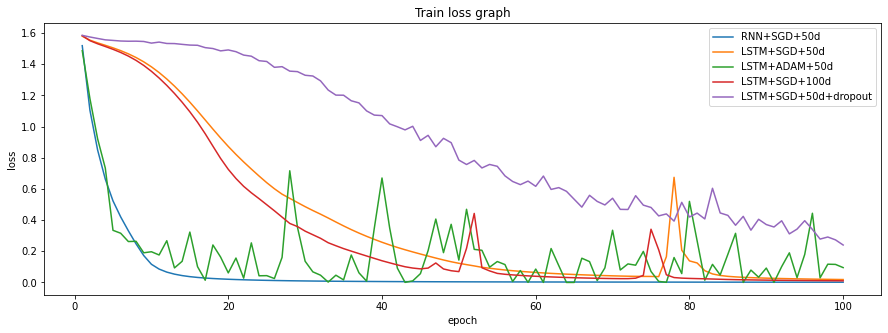

In [26]:
loss_lists = [a_train_loss_list, b_train_loss_list, c_train_loss_list, d_train_loss_list, e_train_loss_list]
plt.figure(figsize =(15, 5))
for exp, train_loss in zip(experiments, loss_lists):
    # print(epoch, len(train_loss))
    sns.lineplot(range(1, epochs+1), train_loss, label = exp)

plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Train loss graph")
plt.show()